In [84]:
# Libraries Imported.
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import plotly.express as px
import warnings
from itertools import combinations

In [85]:
df = sns.load_dataset('iris') # Loading in Dataset

In [86]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
5,5.40,3.90,1.70,0.40,setosa
6,4.60,3.40,1.40,0.30,setosa
7,5.00,3.40,1.50,0.20,setosa
8,4.40,2.90,1.40,0.20,setosa
9,4.90,3.10,1.50,0.10,setosa


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [88]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [110]:
summary_stats = df.describe().T

summary_stats

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.00,5.84,0.83,4.30,5.10,5.80,6.40,7.90
sepal_width,150.00,3.06,0.44,2.00,2.80,3.00,3.30,4.40
petal_length,150.00,3.76,1.77,1.00,1.60,4.35,5.10,6.90
petal_width,150.00,1.20,0.76,0.10,0.30,1.30,1.80,2.50


In [108]:
# Summary statistics for each species
spec_summary_stats = df.groupby('species').describe()


# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

spec_summary_stats

sepal_length                                    sepal_width                                    petal_length                                    petal_width                                   
                  count mean  std  min  25%  50%  75%  max       count mean  std  min  25%  50%  75%  max        count mean  std  min  25%  50%  75%  max       count mean  std  min  25%  50%  75%  max
species                                                                                                                                                                                                 
setosa            50.00 5.01 0.35 4.30 4.80 5.00 5.20 5.80       50.00 3.43 0.38 2.30 3.20 3.40 3.68 4.40        50.00 1.46 0.17 1.00 1.40 1.50 1.58 1.90       50.00 0.25 0.11 0.10 0.20 0.20 0.30 0.60
versicolor        50.00 5.94 0.52 4.90 5.60 5.90 6.30 7.00       50.00 2.77 0.31 2.00 2.52 2.80 3.00 3.40        50.00 4.26 0.47 3.00 4.00 4.35 4.60 5.10       50.00 1.33 0.20 1.00 1.20 1.30 1.50 1.80
virginica         50.00 6.59 0.64 4.90 6.22 6.50 6.90 7.90       50.00 2.97 0.32 2.20 2.80 3.00 3.18 3.80        50.00 5.55 0.55 4.50 5.10 5.55 5.88 6.90       50.00 2.03 0.27 1.40 1.80 2.00 2.30 2.50

In [91]:
#Creating a function
def bar_label(ax):
    for i in ax.patches: # Looping through each bar in the barplot.
        # Using the .annotate element to add text to the graph. 
        ax.annotate(format(i.get_height(), '.2f'), # Getting the height to 2 decimal places. .get_height will return the height of the bar. This is done for all bars in the graph as its a for loop.
                    # .get_x will return the x-coordinate of the left hand side of each bar/ .get_width returns the width of the bar.
                    # First getting the x-cord of the left hand side and adding the width. Then dividing by 2 to centre where the text should be.
                       (i.get_x() + i.get_width() / 2., i.get_height()), # get_height is used to denote where on the Y axis the text should be
                       ha = 'center', va = 'center', # Aligning the text to be horizontally and vertically centred.
                       size=18, # Denoting the font size of the text to be 18.
                       # Setting the coordinates of the text on the x axis to be 0, as I am happy with the text being centred.
                       xytext = (0, -14),  # Setting the coordinates of text on the y axis to be -14, as I would like the text to be just below the top of the bar.
                       textcoords = 'offset points') # Offsetting the text from reference points.

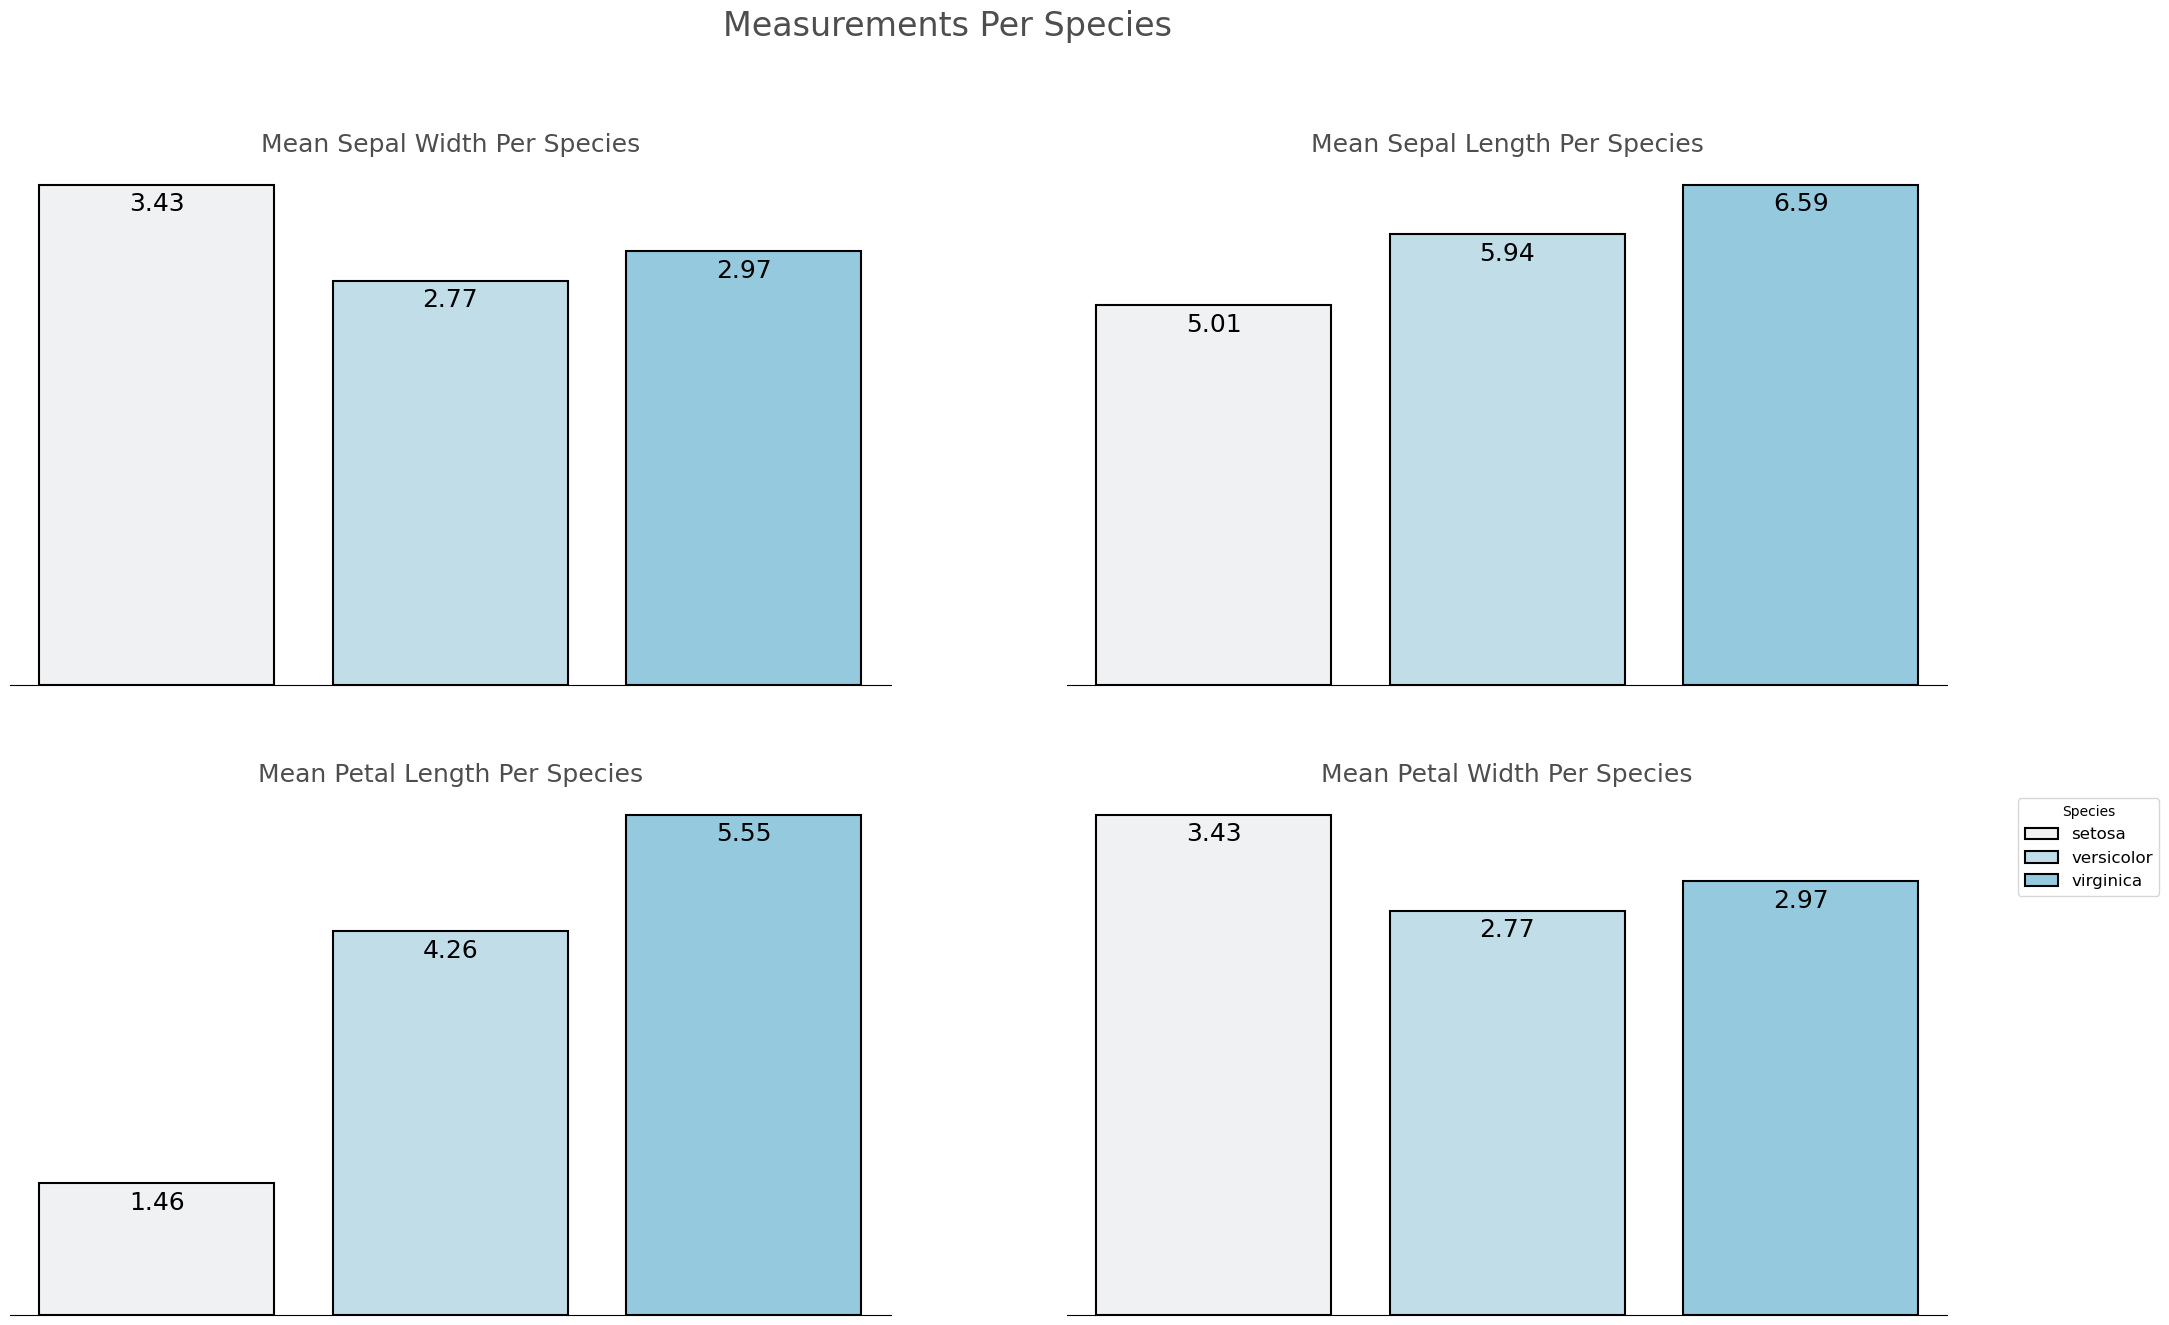

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(25, 15))

# Plot for sepal width
plt.subplot(2, 2, 1)
ax_1 = sns.barplot(data=df, x="species", y="sepal_width", 
                  hue="species",
                  color='skyblue',
                  edgecolor='black',
                  errorbar=None,
                  dodge=False,
                  linewidth=1.5)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Sepal Width Per Species', size=18, color='#4f4e4e')
ax_1.legend_.remove() # Remove individual legends

# Plot for sepal length
plt.subplot(2, 2, 2)
ax_2 = sns.barplot(data=df, x="species", y="sepal_length", 
                  hue="species",
                  color='skyblue',
                  edgecolor='black',
                  errorbar=None,
                  dodge=False,
                  linewidth=1.5)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Sepal Length Per Species', size=18, color='#4f4e4e')
ax_2.legend_.remove() # Remove individual legends

# Plot for petal length
plt.subplot(2, 2, 3)
ax_3 = sns.barplot(data=df, x="species", y="petal_length", 
                  hue="species",
                  color='skyblue',
                  edgecolor='black',
                  errorbar=None,
                  dodge=False,
                  linewidth=1.5)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Petal Length Per Species', size=18, color='#4f4e4e')
ax_3.legend_.remove() # Remove individual legends

# Plot for petal width
plt.subplot(2, 2, 4)
ax_4 = sns.barplot(data=df, x="species", y="sepal_width", 
                  hue="species",
                  color='skyblue',
                  edgecolor='black',
                  errorbar=None,
                  dodge=False,
                  linewidth=1.5)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Petal Width Per Species', size=18, color='#4f4e4e')
ax_4.legend(title="Species", loc='upper right', bbox_to_anchor=(1.25, 1), fontsize='large') # Add a single legend with larger font size
sns.despine(left=True) # Using the despine function to remove the axis lines on the left hand side

# Add a title to the figure
plt.suptitle('Measurements Per Species', size=24, color='#4f4e4e')

bar_label(ax_1)
bar_label(ax_2)
bar_label(ax_3)
bar_label(ax_4)

# Show plot
plt.show()


## Distribution

c:\Users\Barry\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


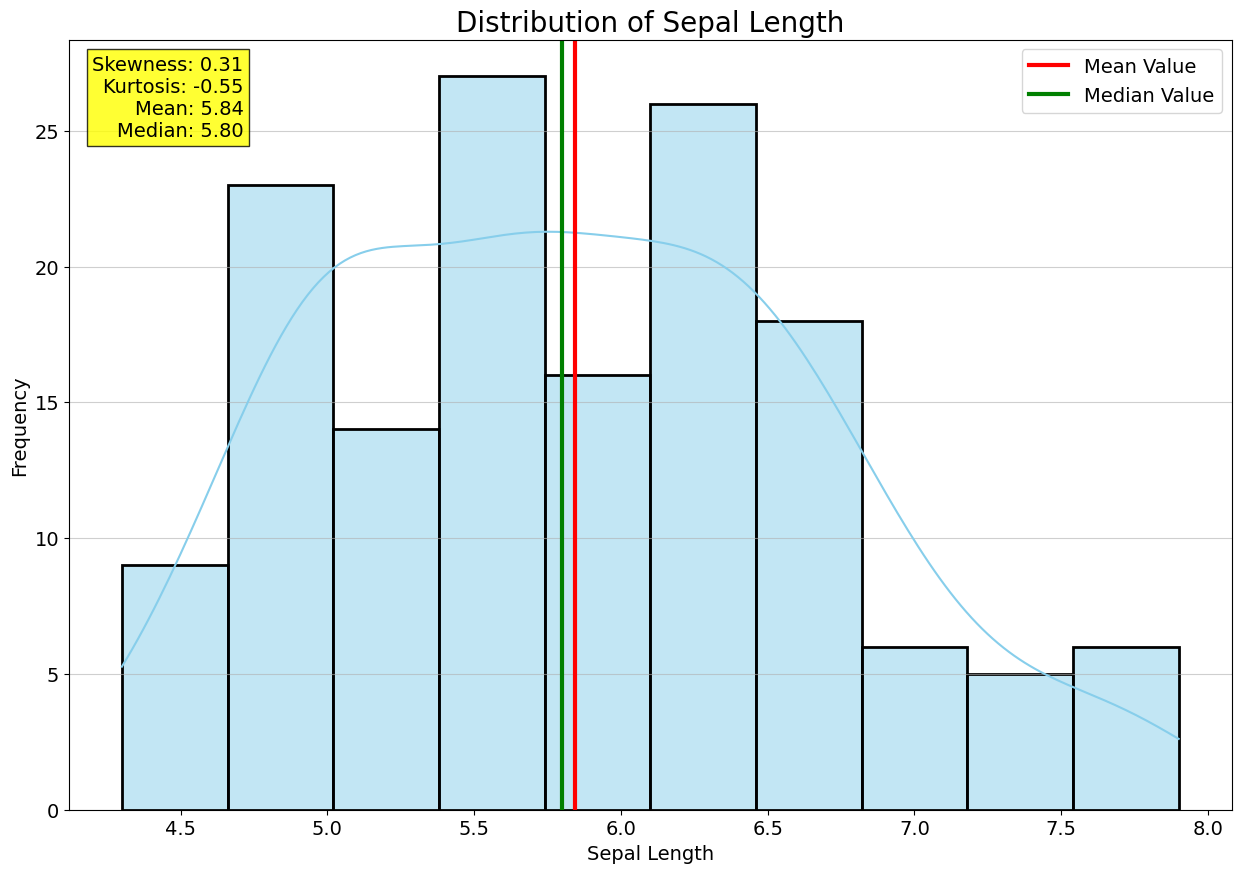

In [93]:
plt.figure(figsize=(15, 10))  # Setting the size of the plot

# Plotting the distribution
sns.histplot(df['sepal_length'],
            kde=True,
            bins=10,
            color='skyblue',
            edgecolor='black',
            linewidth=2)

# Plot formatting
plt.title('Distribution of Sepal Length', size=20)
plt.xlabel('Sepal Length', size=14)
plt.ylabel('Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Adding mean and median lines
plt.axvline(x=df['sepal_length'].mean(),
            label='Mean Value',
            color='red',
            linewidth=3,
            linestyle='-')
plt.axvline(x=df['sepal_length'].median(),
            label='Median Value',
            color='green',
            linewidth=3,
            linestyle='-')
plt.legend(fontsize=14)

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['sepal_length'].mean()
median = df['sepal_length'].median()
skewness = df['sepal_length'].skew()
kurtosis = df['sepal_length'].kurt()

plt.text(0.15, 0.98,
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=14, 
         bbox=dict(facecolor='yellow', alpha=0.8),
         verticalalignment='top', horizontalalignment='right')

# Show plot
plt.show()

c:\Users\Barry\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


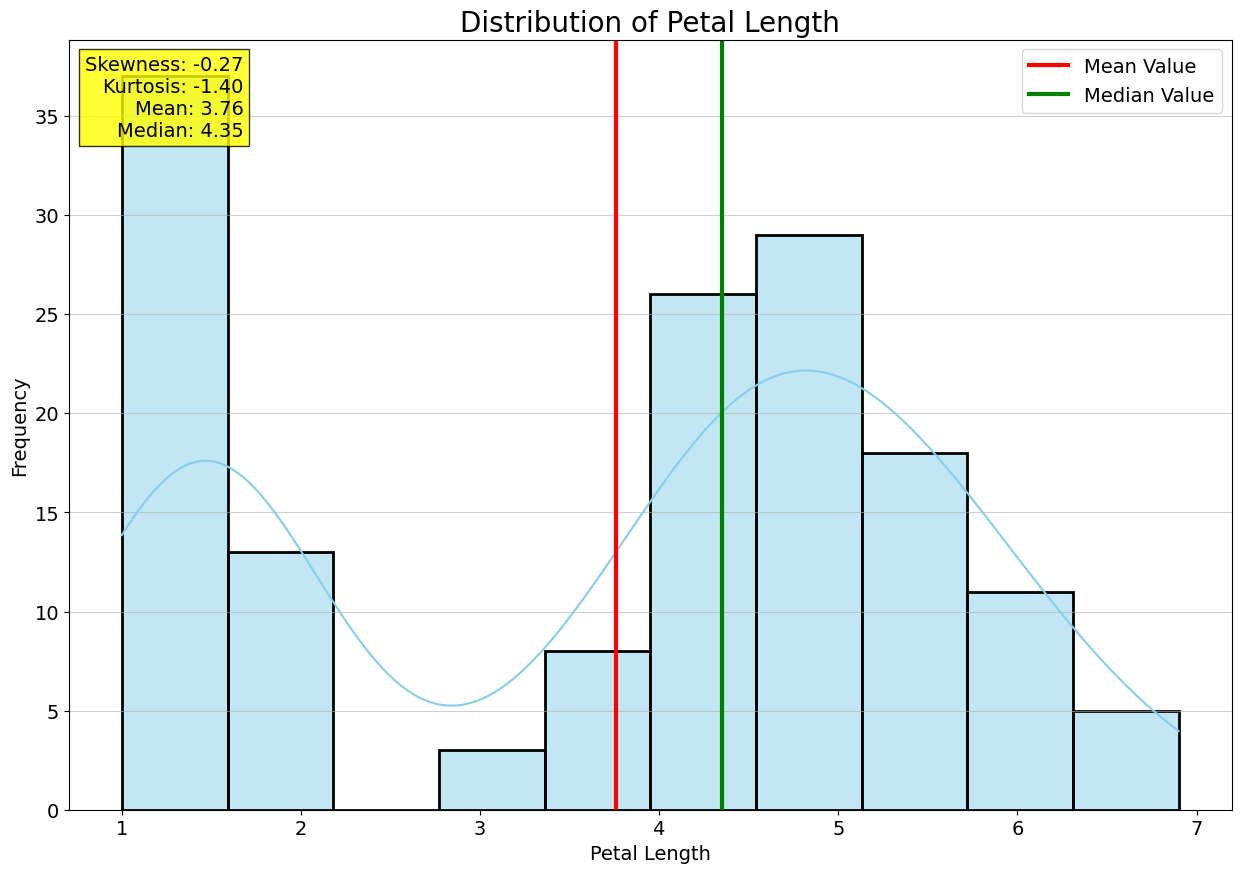

In [94]:
plt.figure(figsize=(15, 10))  # Setting the size of the plot

# Plotting the distribution
sns.histplot(df['petal_length'],
            kde=True,
            bins=10,
            color='skyblue',
            edgecolor='black',
            linewidth=2)

# Plot formatting
plt.title('Distribution of Petal Length', size=20)
plt.xlabel('Petal Length', size=14)
plt.ylabel('Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Adding mean and median lines
plt.axvline(x=df['petal_length'].mean(),
            label='Mean Value',
            color='red',
            linewidth=3,
            linestyle='-')
plt.axvline(x=df['petal_length'].median(),
            label='Median Value',
            color='green',
            linewidth=3,
            linestyle='-')
plt.legend(fontsize=14)

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['petal_length'].mean()
median = df['petal_length'].median()
skewness = df['petal_length'].skew()
kurtosis = df['petal_length'].kurt()

plt.text(0.15, 0.98,
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=14, 
         bbox=dict(facecolor='yellow', alpha=0.8),
         verticalalignment='top', horizontalalignment='right')

# Show plot
plt.show()

c:\Users\Barry\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


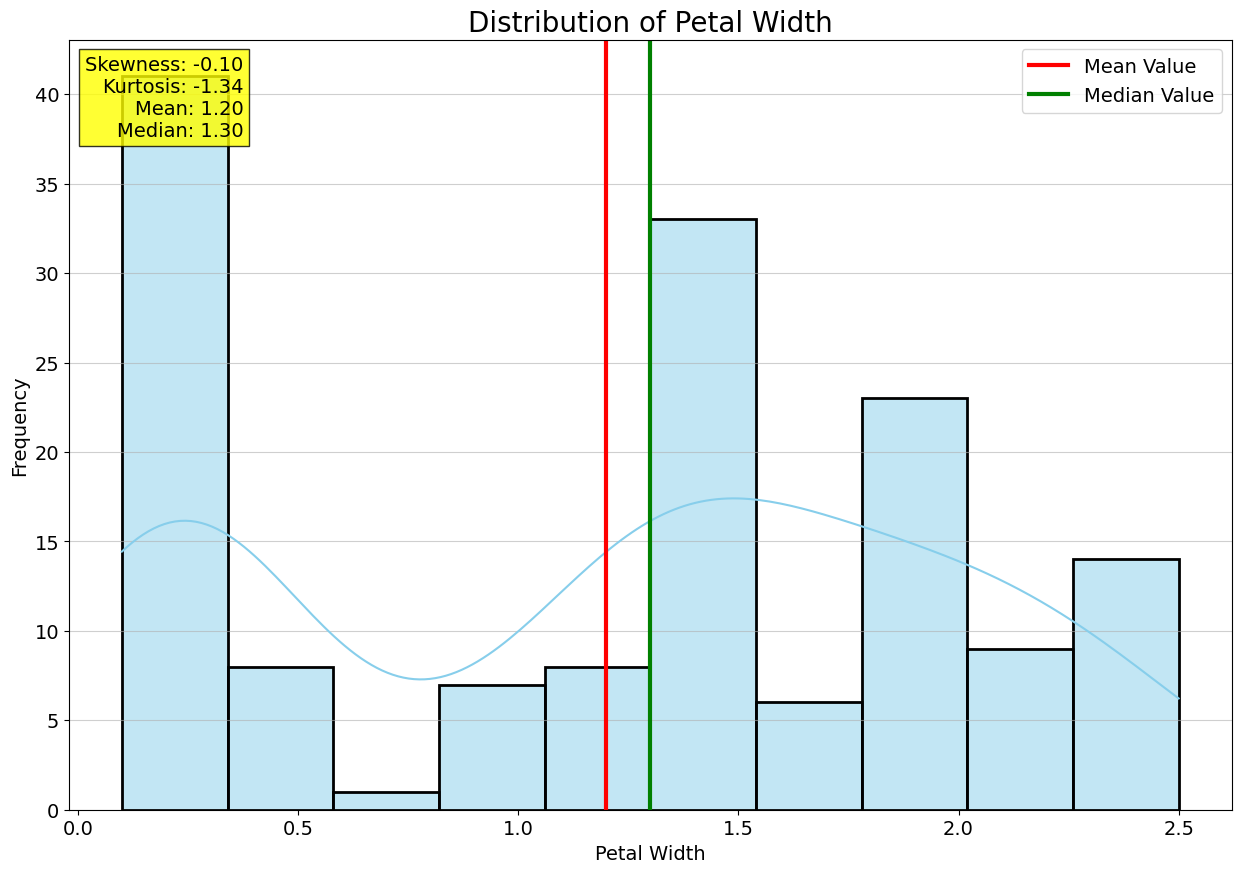

In [95]:
plt.figure(figsize=(15, 10))  # Setting the size of the plot

# Plotting the distribution
sns.histplot(df['petal_width'],
            kde=True,
            bins=10,
            color='skyblue',
            edgecolor='black',
            linewidth=2)

# Plot formatting
plt.title('Distribution of Petal Width', size=20)
plt.xlabel('Petal Width', size=14)
plt.ylabel('Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Adding mean and median lines
plt.axvline(x=df['petal_width'].mean(),
            label='Mean Value',
            color='red',
            linewidth=3,
            linestyle='-')
plt.axvline(x=df['petal_width'].median(),
            label='Median Value',
            color='green',
            linewidth=3,
            linestyle='-')
plt.legend(fontsize=14)

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['petal_width'].mean()
median = df['petal_width'].median()
skewness = df['petal_width'].skew()
kurtosis = df['petal_width'].kurt()

plt.text(0.15, 0.98,
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=14, 
         bbox=dict(facecolor='yellow', alpha=0.8),
         verticalalignment='top', horizontalalignment='right')

# Show plot
plt.show()

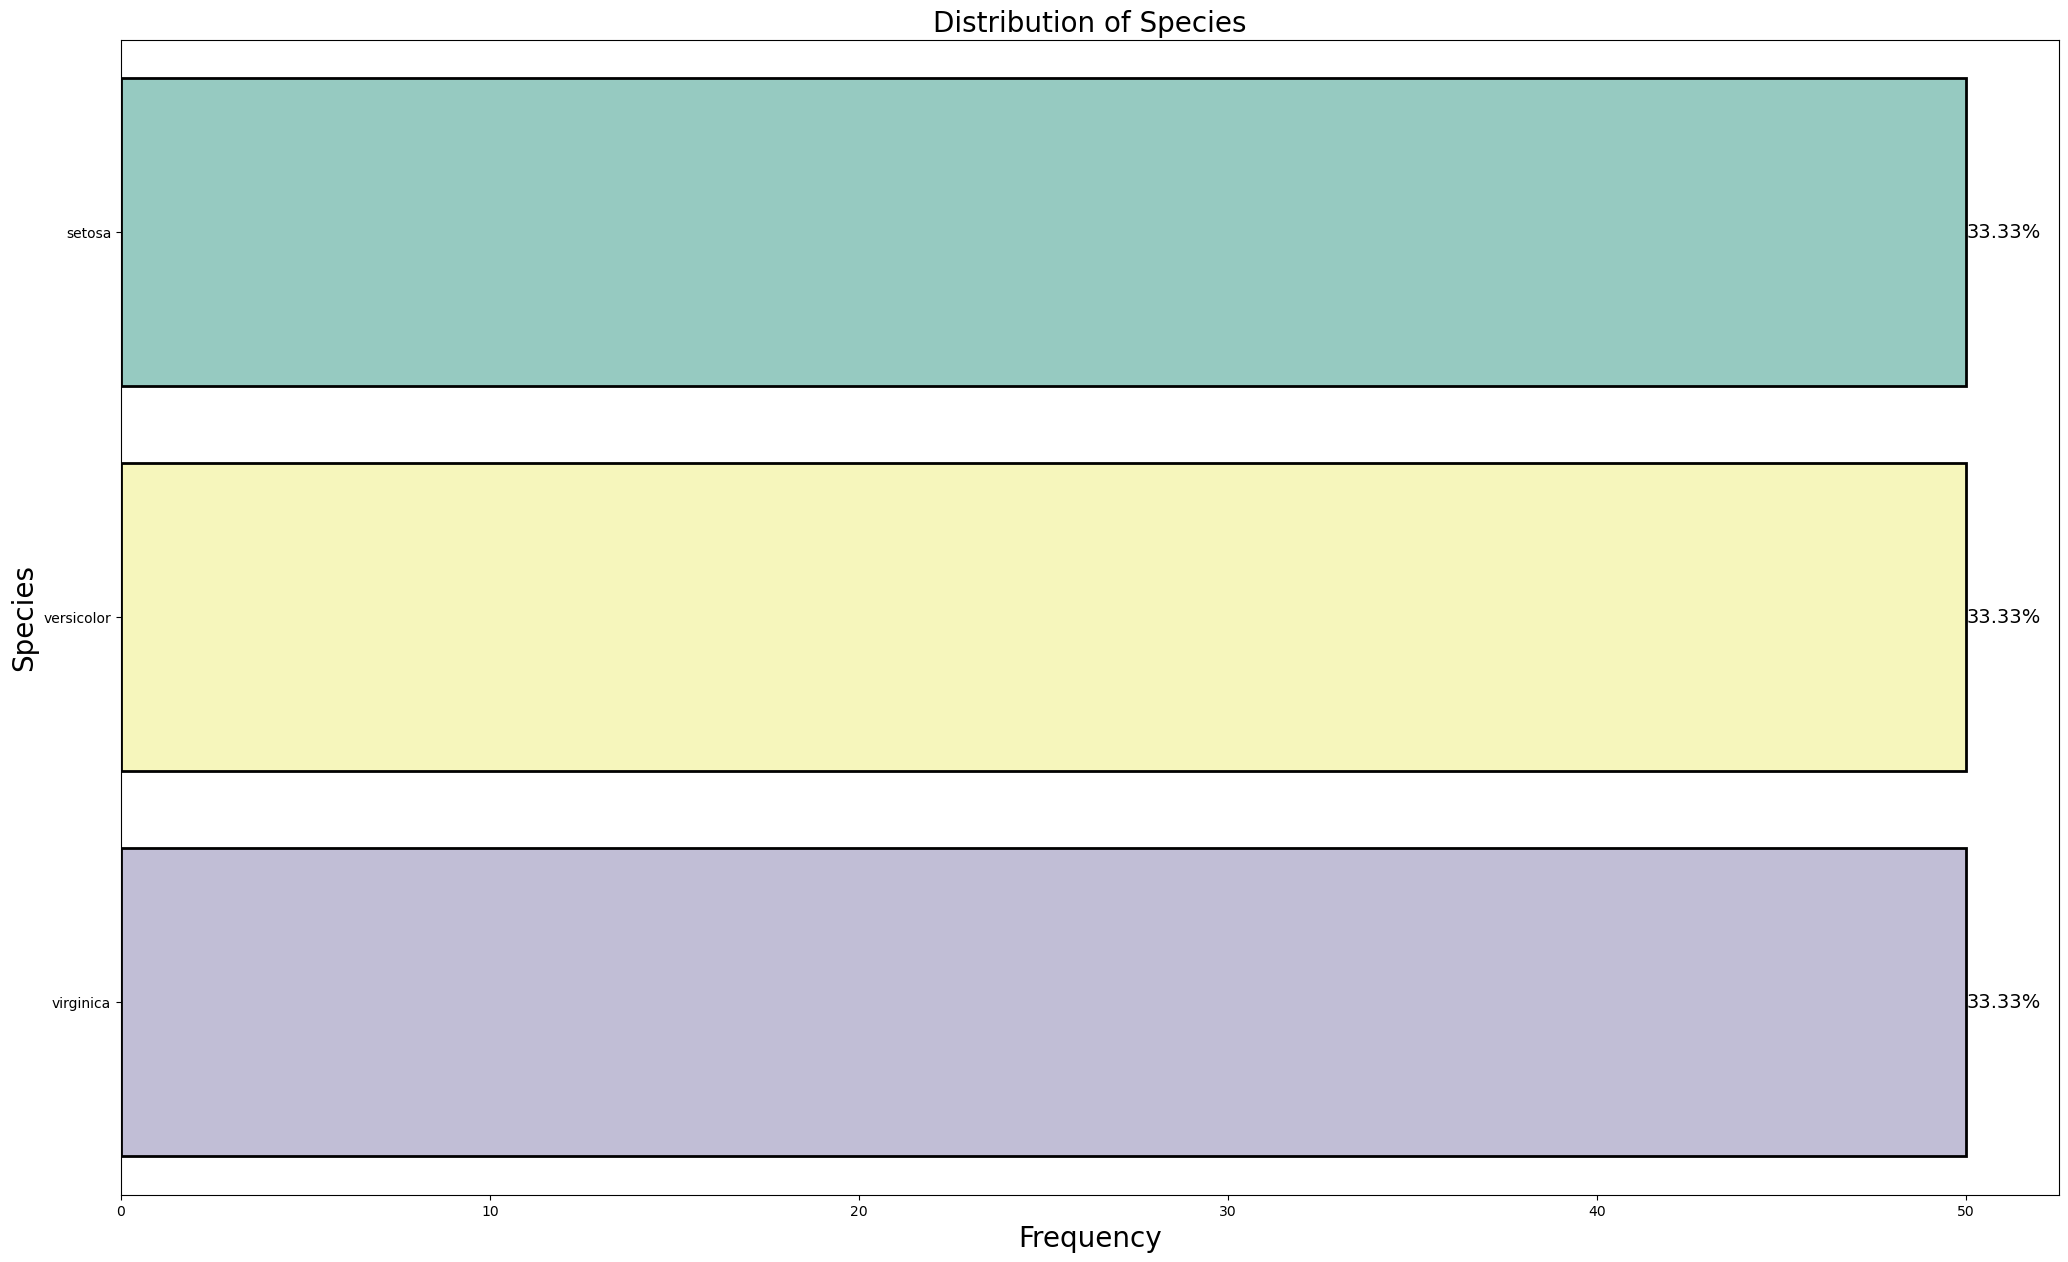

In [96]:
plt.figure(figsize=(25, 15))  # Setting the size of the plot
ax = sns.countplot(data=df, y="species", edgecolor='black', palette='Set3', linewidth=2)
plt.title('Distribution of Species', size=20)
plt.xlabel('Frequency', size=20)
plt.ylabel('Species', size=20)

total = len(df['species'])
for p in ax.patches:
    percent = '{:.2f}%'.format(100 * p.get_width()/total)
    x_ax = p.get_width()
    y_ax = p.get_y() + p.get_height()/2
    ax.annotate(percent, (x_ax, y_ax), ha='left', va='center', fontsize=14)

plt.show()

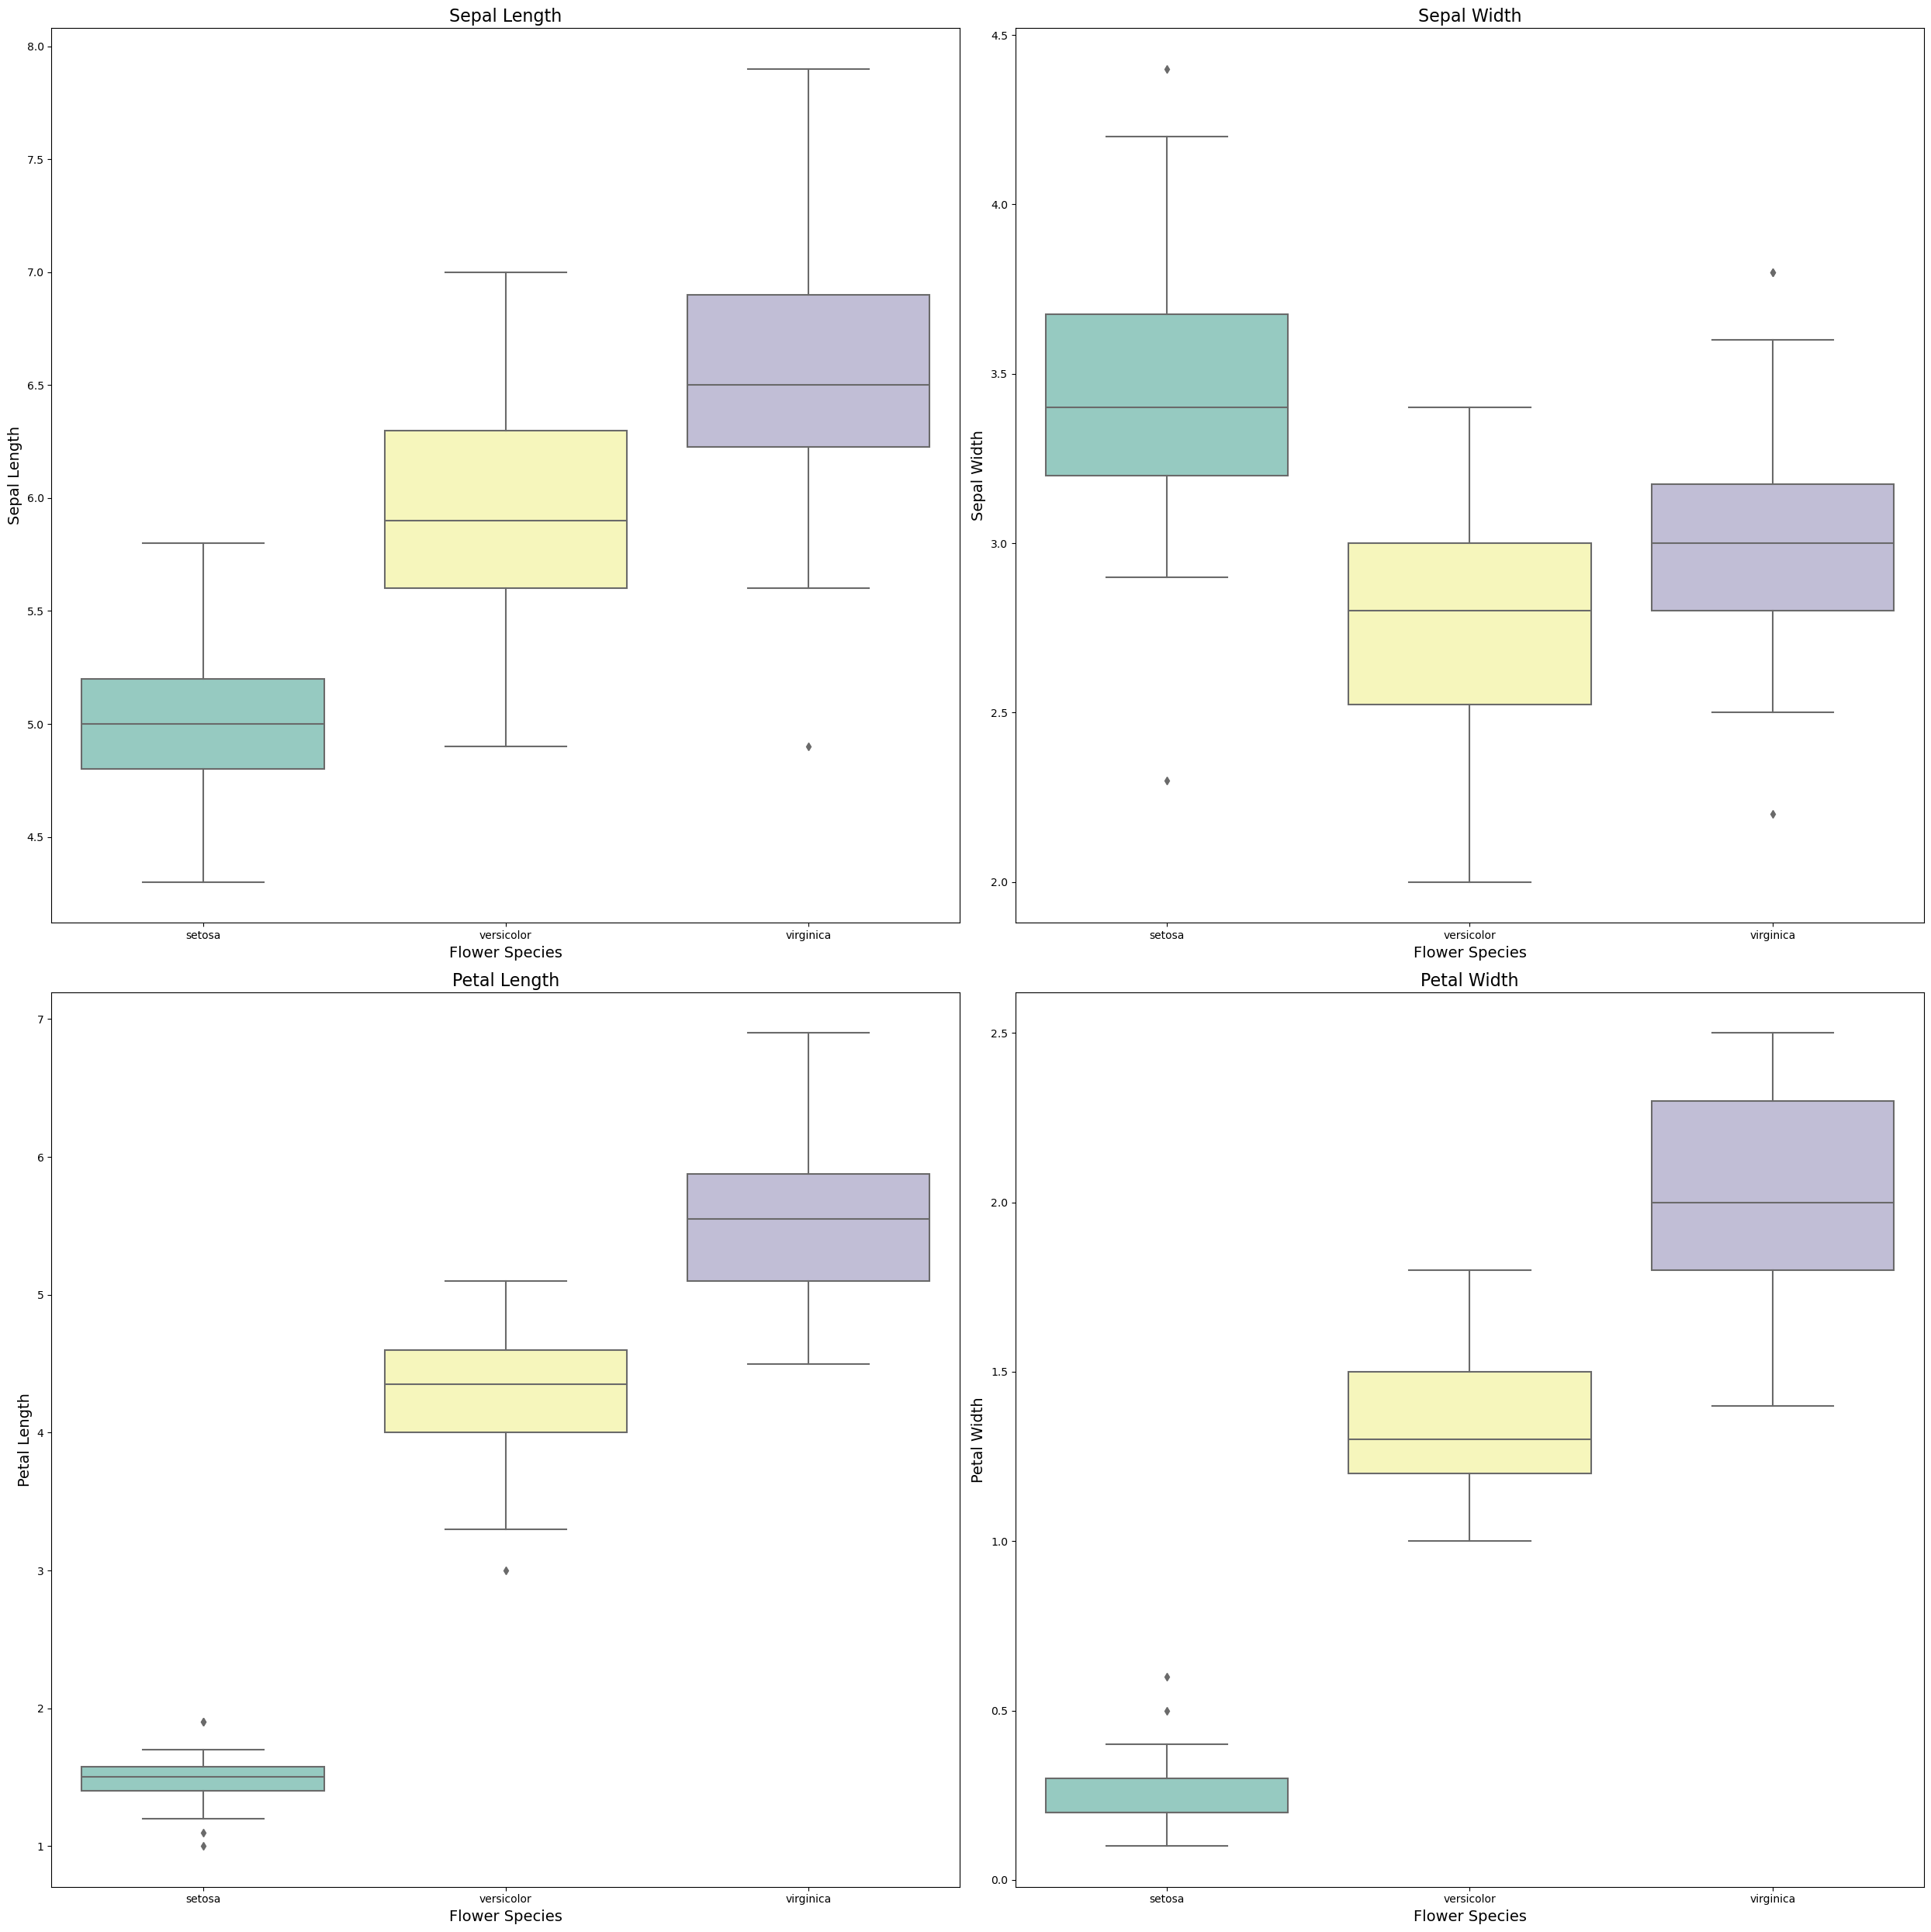

In [97]:
a, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.boxplot(x="species", y="sepal_length", data=df, ax=ax[0, 0], palette='Set3')
ax[0, 0].set_title('Sepal Length', size=16)
ax[0, 0].set_xlabel('Flower Species', size=14)
ax[0, 0].set_ylabel('Sepal Length', size=14)

sns.boxplot(x="species", y="sepal_width", data=df, ax=ax[0, 1], palette='Set3')
ax[0, 1].set_title('Sepal Width', size=16)
ax[0, 1].set_xlabel('Flower Species', size=14)
ax[0, 1].set_ylabel('Sepal Width', size=14)

sns.boxplot(x="species", y="petal_length", data=df, ax=ax[1, 0], palette='Set3')
ax[1, 0].set_title('Petal Length', size=16)
ax[1, 0].set_xlabel('Flower Species', size=14)
ax[1, 0].set_ylabel('Petal Length', size=14)

sns.boxplot(x="species", y="petal_width", data=df, ax=ax[1, 1], palette='Set3')
ax[1, 1].set_title('Petal Width', size=16)
ax[1, 1].set_xlabel('Flower Species', size=14)
ax[1, 1].set_ylabel('Petal Width', size=14)

plt.tight_layout()
plt.show()

## Correlation Analysis

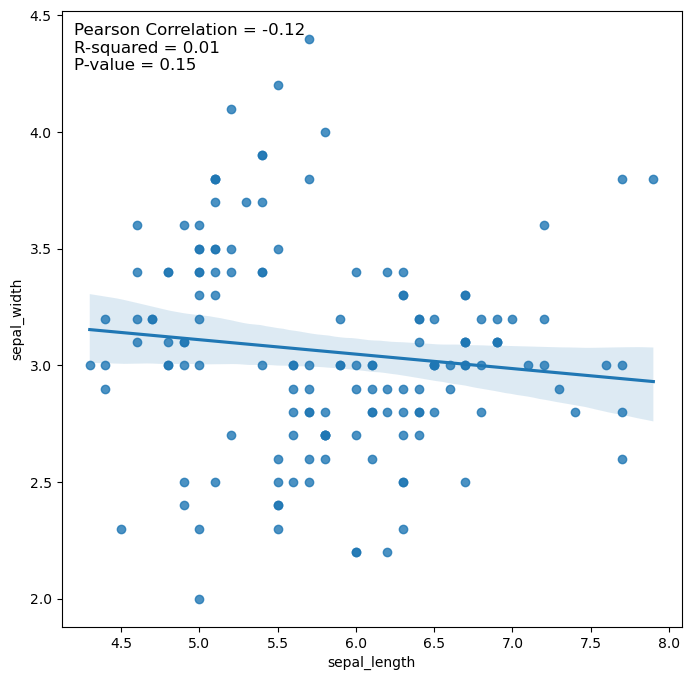

In [98]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_length", y="sepal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_length"], df["sepal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

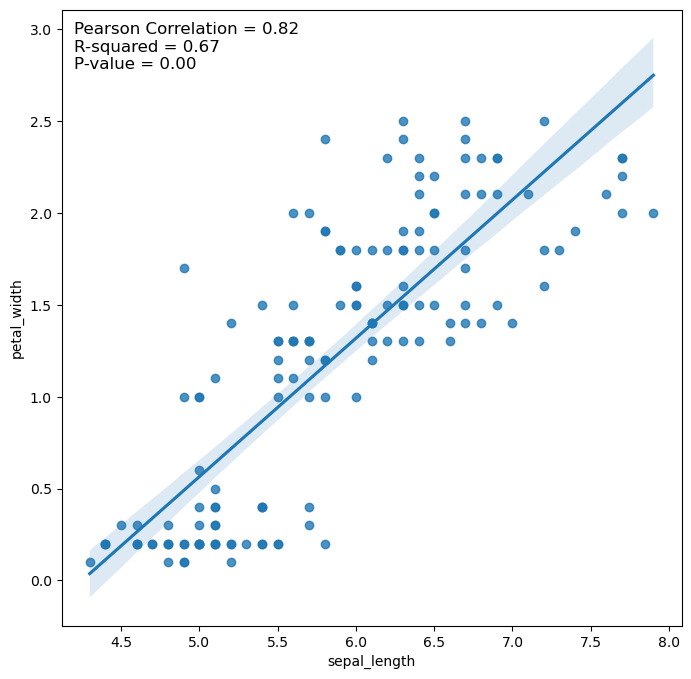

In [99]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_length", y="petal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_length"], df["petal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

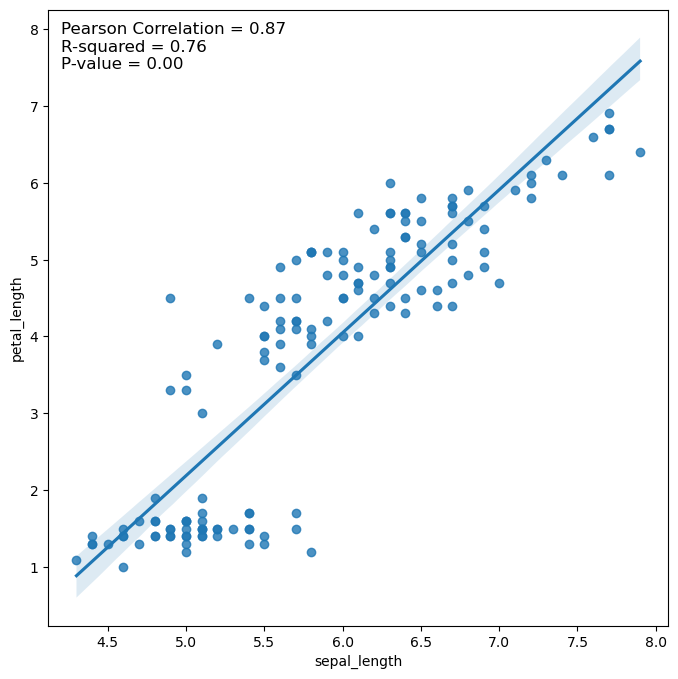

In [100]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_length", y="petal_length") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_length"], df["petal_length"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

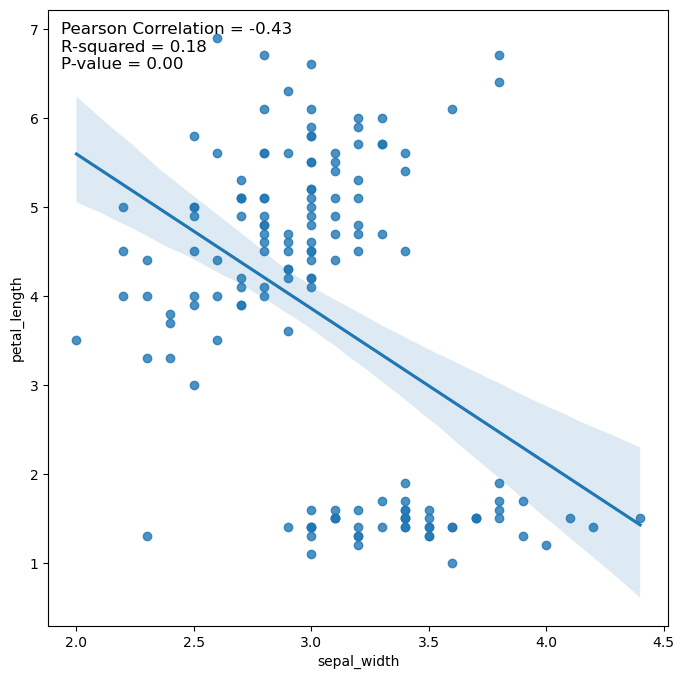

In [101]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_width", y="petal_length") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_width"], df["petal_length"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

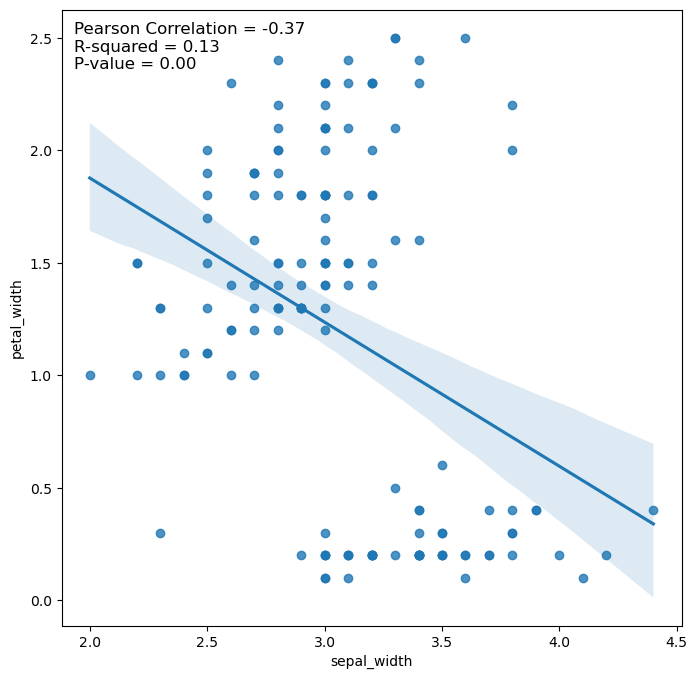

In [102]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_width", y="petal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_width"], df["petal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

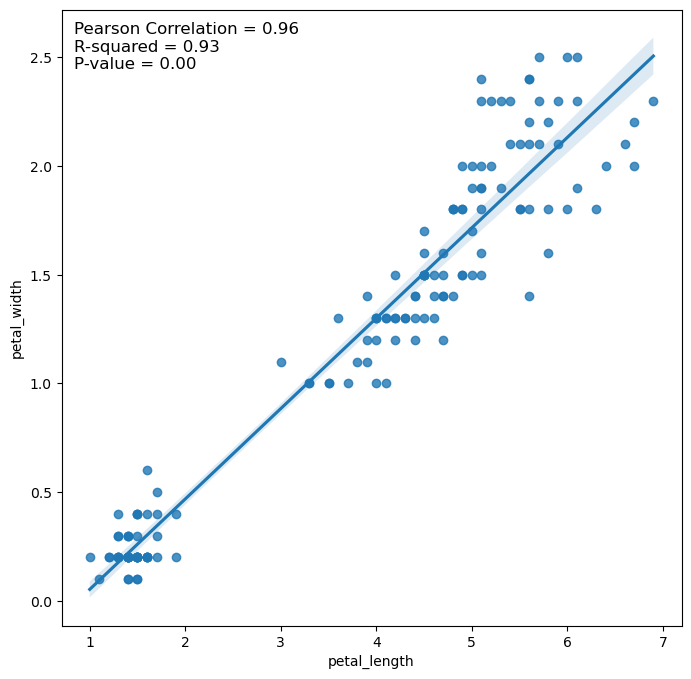

In [103]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="petal_length", y="petal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["petal_length"], df["petal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

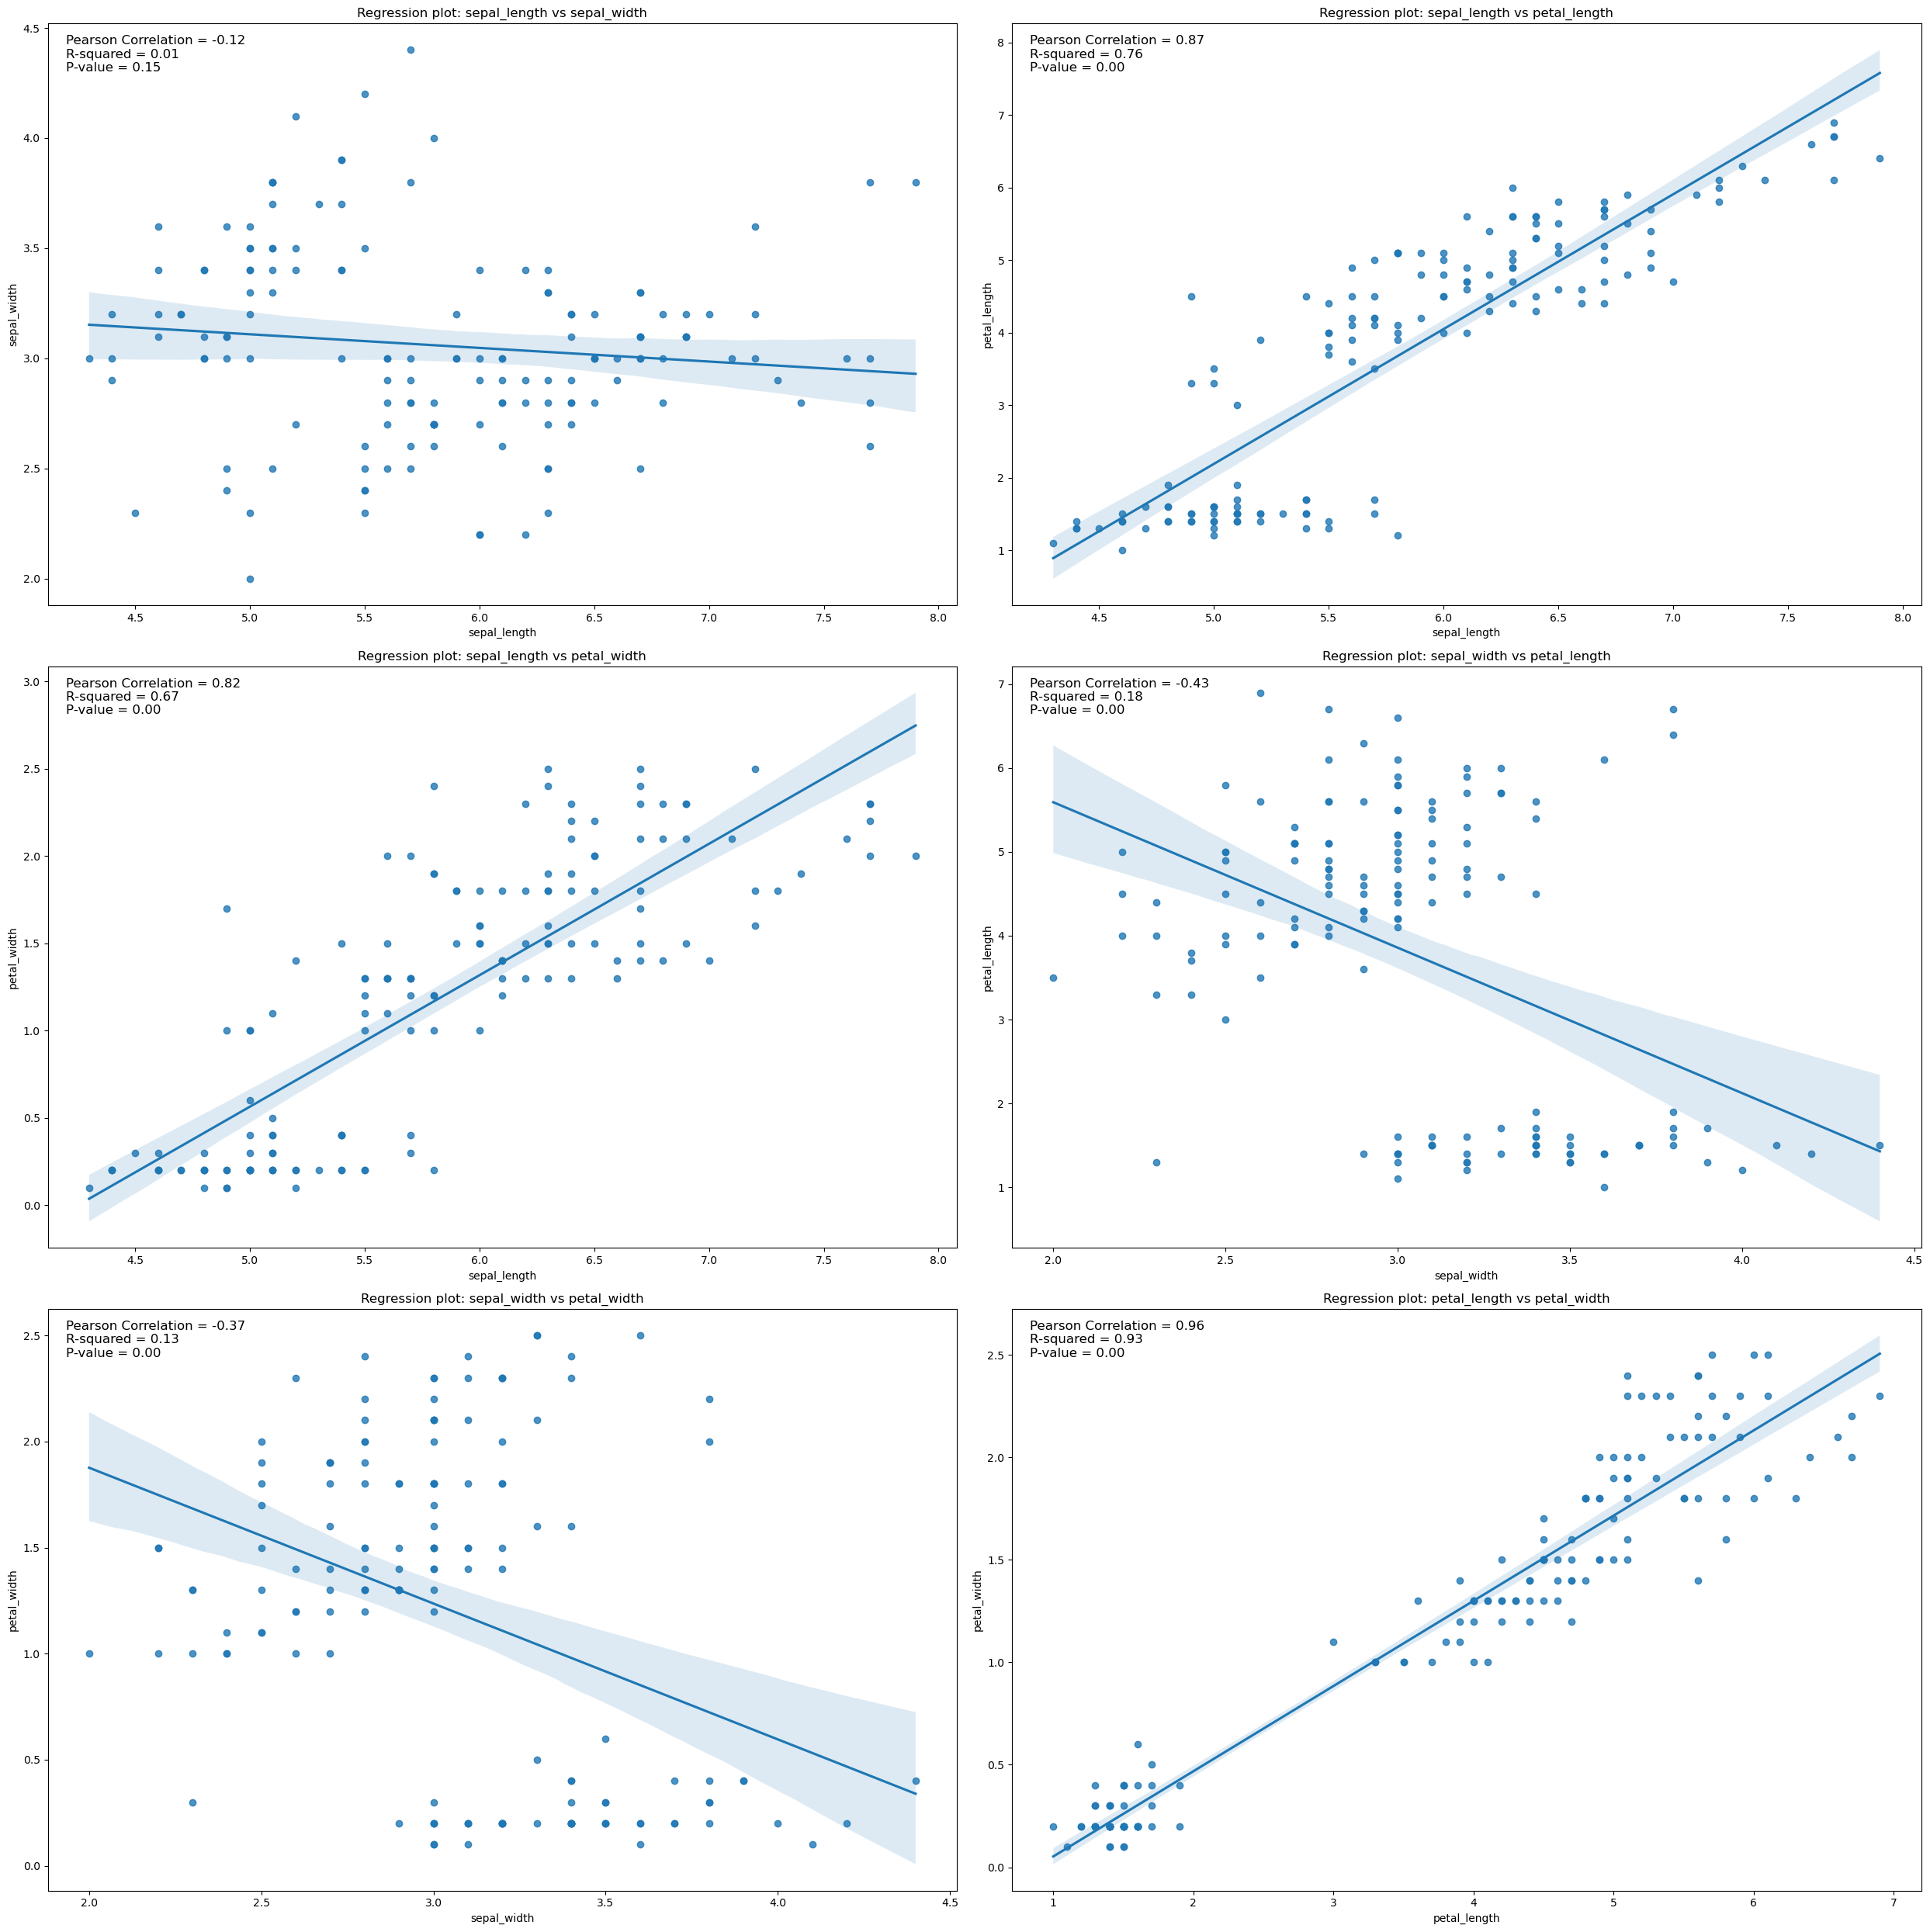

In [107]:
numeric_df = df.select_dtypes(include=[np.number])
# Get all combinations of numeric columns
column_combinations = list(combinations(numeric_df.columns, 2))

# Create a 3 by 2 subplot and add regression plots for each combination of numeric variables
fig, axes = plt.subplots(3, 2, figsize=(25, 25))

for i, ax in enumerate(axes.flatten()):
    if i < len(column_combinations):
        x_column, y_column = column_combinations[i]
        
        sns.regplot(data=numeric_df, x=x_column, y=y_column, ax=ax)
        
        r_value, p_value = stats.pearsonr(numeric_df[x_column], numeric_df[y_column])
        r_squared = r_value**2
        
        ax.text(0.02, 0.98,
                f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",
                transform=ax.transAxes,
                fontsize=12,
                va='top')
        
        ax.grid(False)
        ax.set_xlabel(x_column)
        ax.set_ylabel(y_column)
        ax.set_title(f'Regression plot: {x_column} vs {y_column}')

# Remove empty subplots
for i in range(len(column_combinations), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


c:\Users\Barry\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Barry\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Barry\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Barry\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

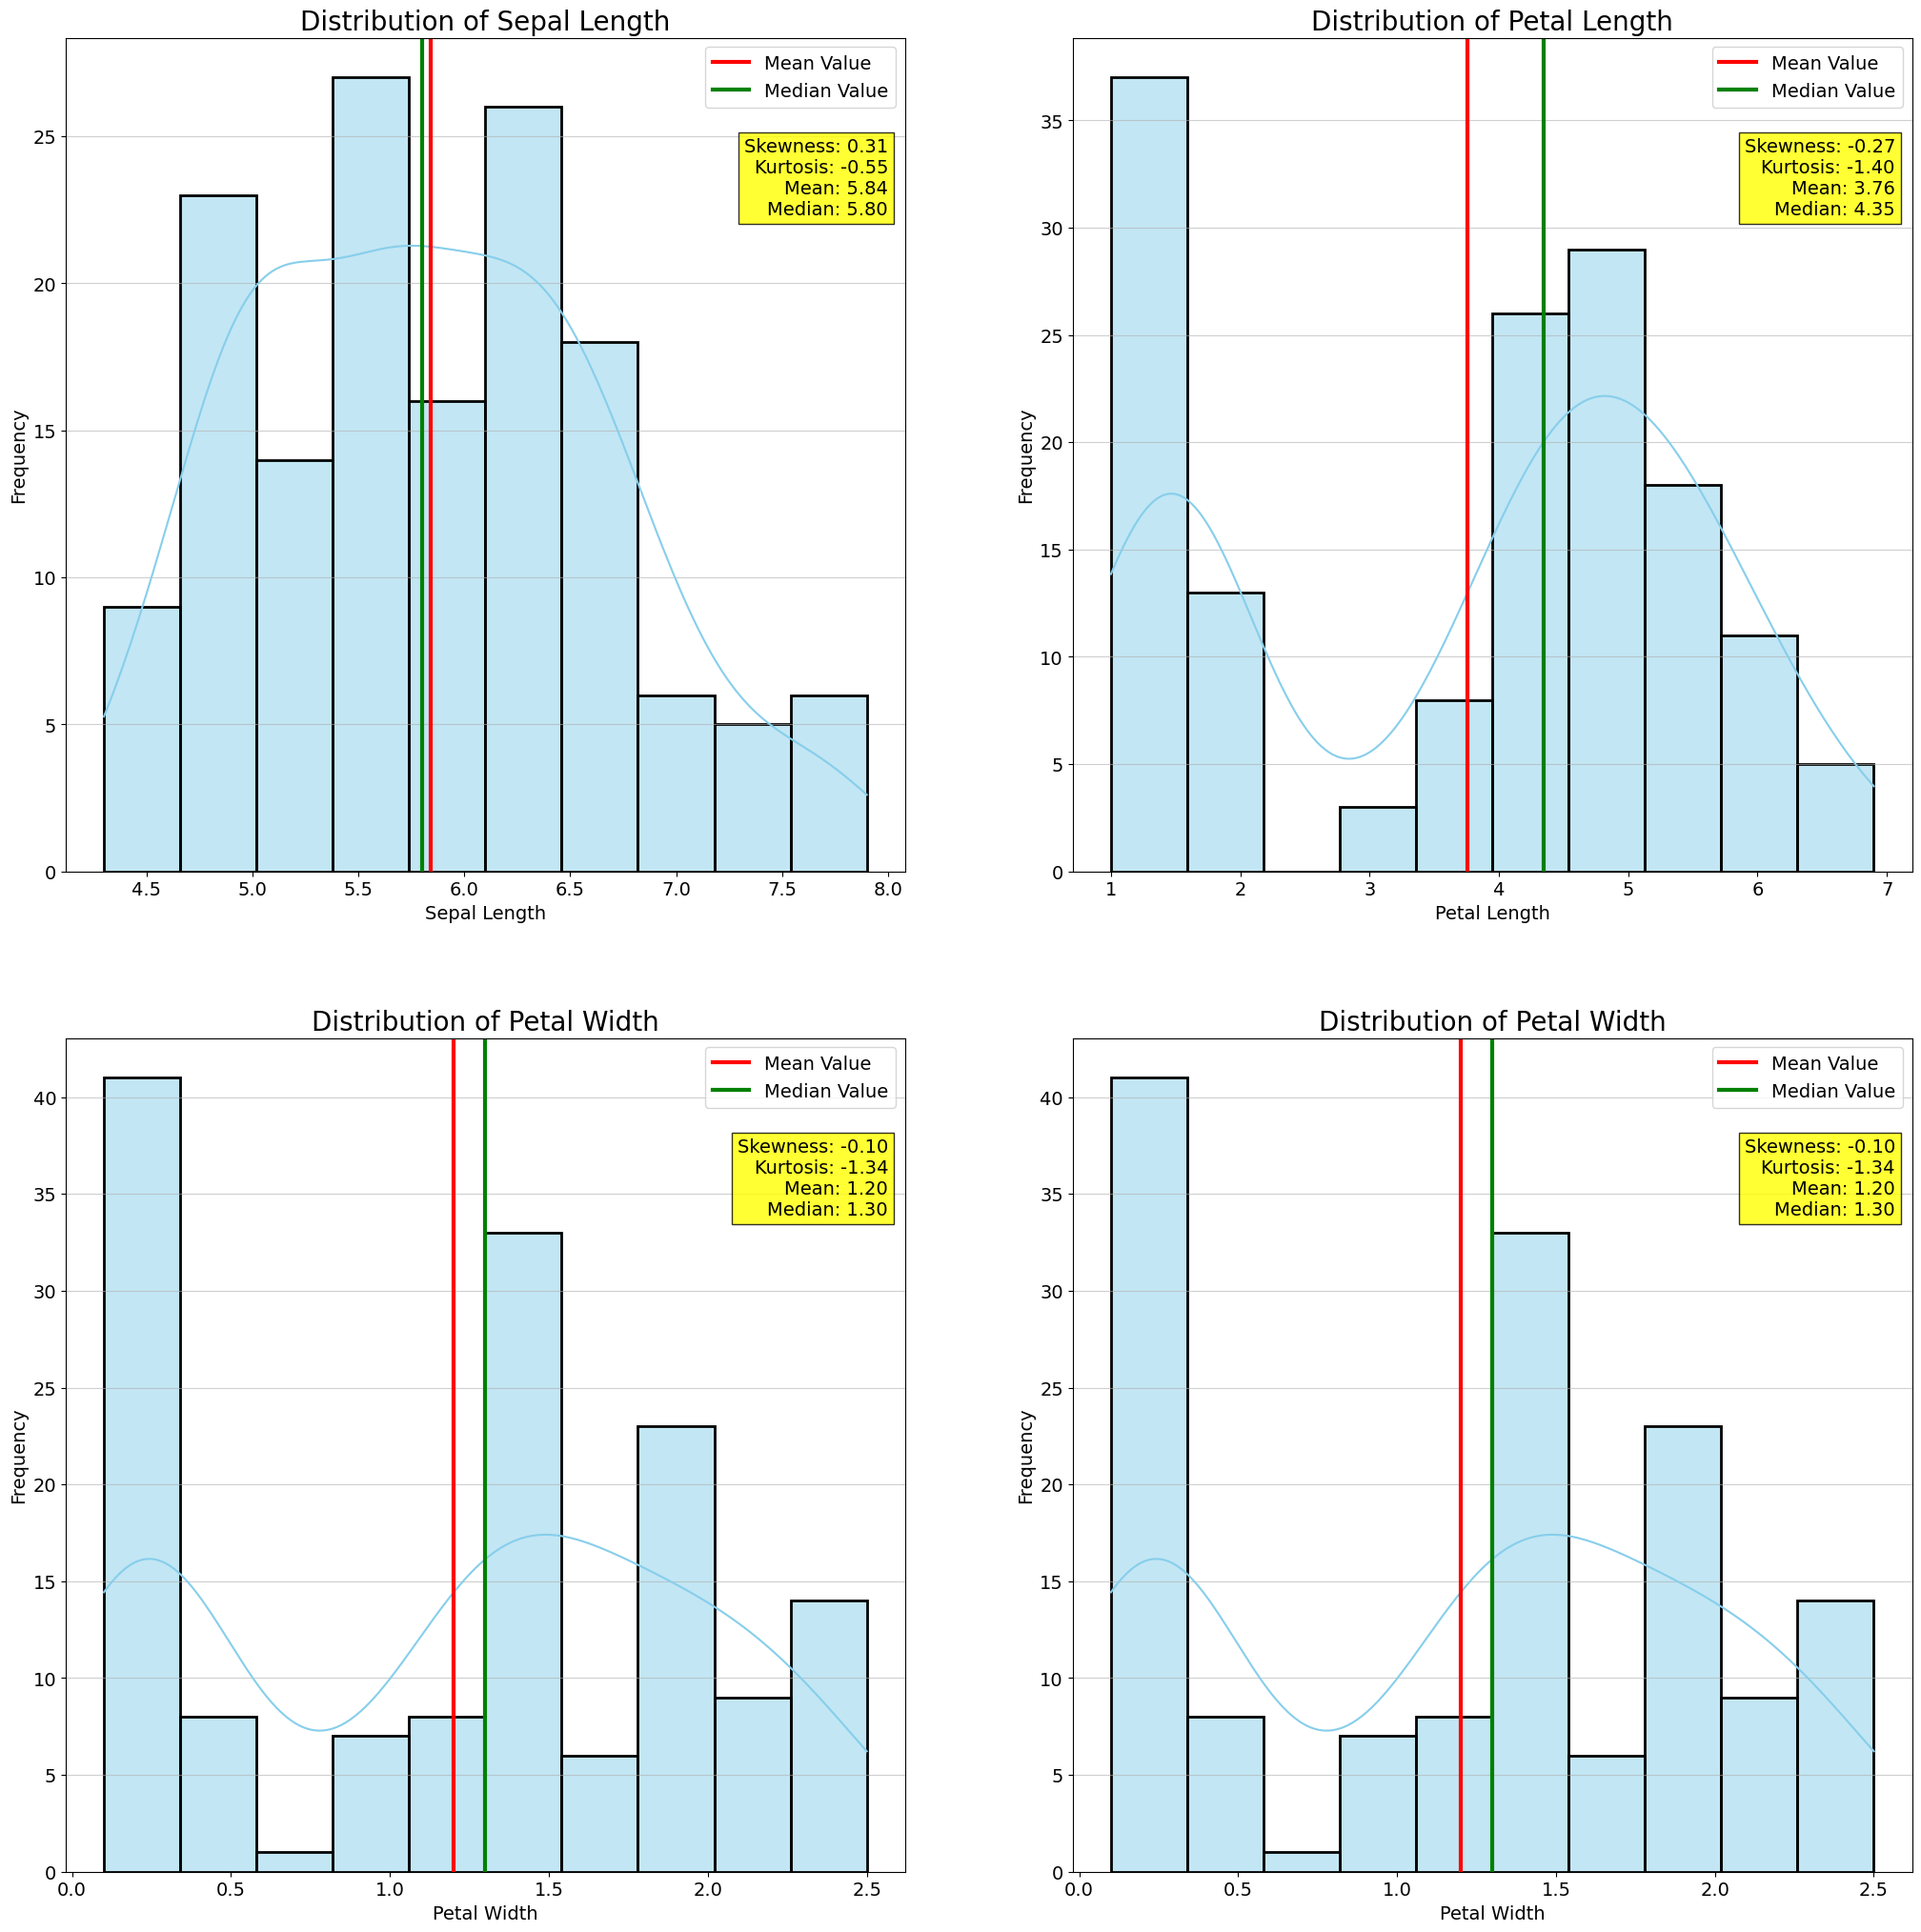

In [105]:
plt.figure(figsize=(25, 25))  # Setting the size of the plot

# Plotting the distribution
plt.subplot(2, 2, 1)
ax1 = sns.histplot(df['sepal_length'],
            kde=True,
            bins=10,
            color='skyblue',
            edgecolor='black',
            linewidth=2)

# Plot formatting
plt.title('Distribution of Sepal Length', size=20)
plt.xlabel('Sepal Length', size=14)
plt.ylabel('Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Adding mean and median lines
plt.axvline(x=df['sepal_length'].mean(),
            label='Mean Value',
            color='red',
            linewidth=3,
            linestyle='-')
plt.axvline(x=df['sepal_length'].median(),
            label='Median Value',
            color='green',
            linewidth=3,
            linestyle='-')
plt.legend(fontsize=14)

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['sepal_length'].mean()
median = df['sepal_length'].median()
skewness = df['sepal_length'].skew()
kurtosis = df['sepal_length'].kurt()

plt.text(0.98, 0.88,
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=14, 
         bbox=dict(facecolor='yellow', alpha=0.8),
         verticalalignment='top', horizontalalignment='right')

plt.subplot(2, 2, 2)
ax_2 = sns.histplot(df['petal_length'],
            kde=True,
            bins=10,
            color='skyblue',
            edgecolor='black',
            linewidth=2)

# Plot formatting
plt.title('Distribution of Petal Length', size=20)
plt.xlabel('Petal Length', size=14)
plt.ylabel('Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Adding mean and median lines
plt.axvline(x=df['petal_length'].mean(),
            label='Mean Value',
            color='red',
            linewidth=3,
            linestyle='-')
plt.axvline(x=df['petal_length'].median(),
            label='Median Value',
            color='green',
            linewidth=3,
            linestyle='-')
plt.legend(fontsize=14)

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['petal_length'].mean()
median = df['petal_length'].median()
skewness = df['petal_length'].skew()
kurtosis = df['petal_length'].kurt()

plt.text(0.98, 0.88,
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=14, 
         bbox=dict(facecolor='yellow', alpha=0.8),
         verticalalignment='top', horizontalalignment='right')
plt.subplot(2, 2, 3)
ax_3 = sns.histplot(df['petal_width'],
            kde=True,
            bins=10,
            color='skyblue',
            edgecolor='black',
            linewidth=2)

# Plot formatting
plt.title('Distribution of Petal Width', size=20)
plt.xlabel('Petal Width', size=14)
plt.ylabel('Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Adding mean and median lines
plt.axvline(x=df['petal_width'].mean(),
            label='Mean Value',
            color='red',
            linewidth=3,
            linestyle='-')
plt.axvline(x=df['petal_width'].median(),
            label='Median Value',
            color='green',
            linewidth=3,
            linestyle='-')
plt.legend(fontsize=14)

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['petal_width'].mean()
median = df['petal_width'].median()
skewness = df['petal_width'].skew()
kurtosis = df['petal_width'].kurt()

plt.text(0.98, 0.88,
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=14, 
         bbox=dict(facecolor='yellow', alpha=0.8),
         verticalalignment='top', horizontalalignment='right')
plt.subplot(2, 2, 4)
ax4 = sns.histplot(df['petal_width'],
            kde=True,
            bins=10,
            color='skyblue',
            edgecolor='black',
            linewidth=2)

# Plot formatting
plt.title('Distribution of Petal Width', size=20)
plt.xlabel('Petal Width', size=14)
plt.ylabel('Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Adding mean and median lines
plt.axvline(x=df['petal_width'].mean(),
            label='Mean Value',
            color='red',
            linewidth=3,
            linestyle='-')
plt.axvline(x=df['petal_width'].median(),
            label='Median Value',
            color='green',
            linewidth=3,
            linestyle='-')
plt.legend(fontsize=14)

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['petal_width'].mean()
median = df['petal_width'].median()
skewness = df['petal_width'].skew()
kurtosis = df['petal_width'].kurt()

plt.text(0.98, 0.88,
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=14, 
         bbox=dict(facecolor='yellow', alpha=0.8),
         verticalalignment='top', horizontalalignment='right')

# Show plot
plt.show()


https://realpython.com/numpy-scipy-pandas-correlation-python/ - # r_value, p_value = stats.pearsonr(df["petal_length"], df["petal_width"])